In [30]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Set style untuk visualisasi yang lebih baik
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Mengatur ukuran figure
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [32]:
# Membaca dataset
df = pd.read_csv('C:/Semester6/bengkel koding/UAS/ObesityDataSet.csv')
df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [34]:
# 1.3 Statistik deskriptif
print("\n1.3 Statistik deskriptif data numerik:")
print(df.describe())


1.3 Statistik deskriptif data numerik:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1

In [35]:
# 1.4 Informasi tentang nilai kosong
print("\n1.4 Informasi tentang nilai kosong:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Jumlah', 'Persentase (%)']
print(missing_data[missing_data['Jumlah'] > 0])


1.4 Informasi tentang nilai kosong:
                                Jumlah  Persentase (%)
Age                                 14        0.663193
Gender                               9        0.426338
Height                              12        0.568451
Weight                              11        0.521080
CALC                                 5        0.236855
FAVC                                11        0.521080
FCVC                                 8        0.378967
NCP                                 12        0.568451
SCC                                 10        0.473709
SMOKE                                5        0.236855
CH2O                                 6        0.284225
family_history_with_overweight      13        0.615822
FAF                                  8        0.378967
TUE                                  9        0.426338
CAEC                                11        0.521080
MTRANS                               6        0.284225


In [36]:
# 1.5 Memeriksa nilai unik pada kolom kategorikal
print("\n1.5 Nilai unik pada kolom kategorikal:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKolom {col}:")
    print(df[col].value_counts())


1.5 Nilai unik pada kolom kategorikal:

Kolom Age:
Age
18           124
26            99
21            96
23            89
19            59
            ... 
33.0816        1
17.178483      1
34.389679      1
18.701766      1
23.664709      1
Name: count, Length: 1394, dtype: int64

Kolom Gender:
Gender
Male      1056
Female    1033
?           13
Name: count, dtype: int64

Kolom Height:
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.704141     1
1.705813     1
1.843172     1
1.545196     1
1.738836     1
Name: count, Length: 1562, dtype: int64

Kolom Weight:
Weight
80            58
50            42
70            41
75            39
60            36
              ..
67.083121      1
90.13868       1
65.912688      1
82.586893      1
133.472641     1
Name: count, Length: 1518, dtype: int64

Kolom CALC:
CALC
Sometimes     1386
no             634
Frequently      70
?               15
Always           1
Name: count, dtype: int64

Kolom FA

In [37]:
# 1.6 Memeriksa duplikasi data
print("\n1.6 Memeriksa duplikasi data:")
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")


1.6 Memeriksa duplikasi data:
Jumlah data duplikat: 18


In [38]:
# 1.7 Memeriksa keseimbangan data (target variable)
print("\n1.7 Keseimbangan data target (NObeyesdad):")
target_counts = df['NObeyesdad'].value_counts()
print(target_counts)


1.7 Keseimbangan data target (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


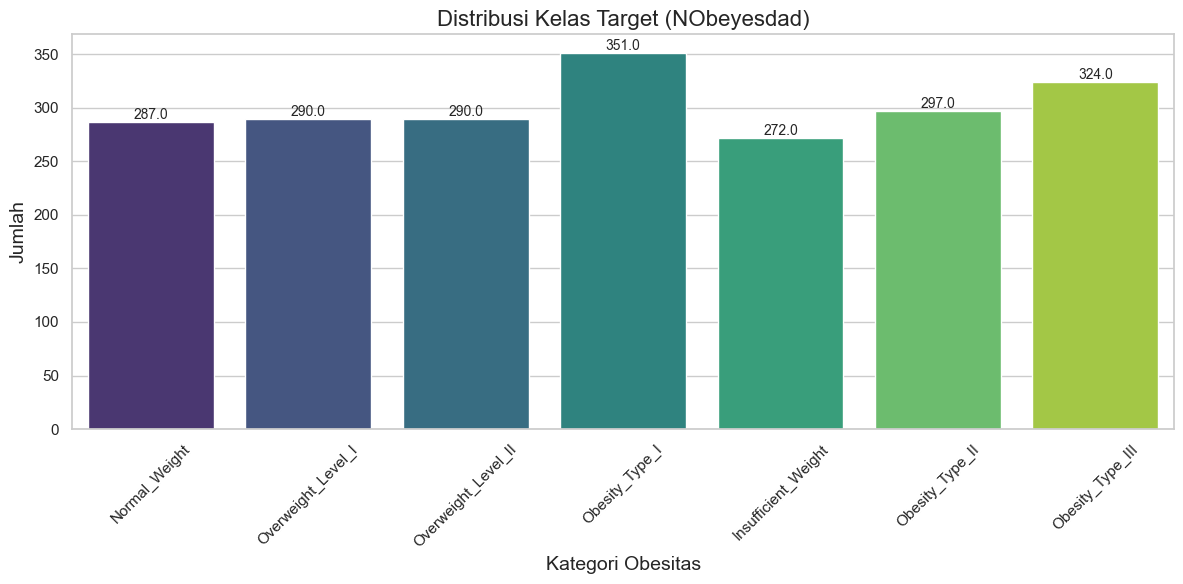

In [39]:
# 1.8 Visualisasi Distribusi Kelas Target
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='NObeyesdad', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=16)
plt.xlabel('Kategori Obesitas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)

# Menambahkan label jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


1.9 Visualisasi korelasi antar fitur numerik:
Kolom numerik yang akan digunakan untuk korelasi: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


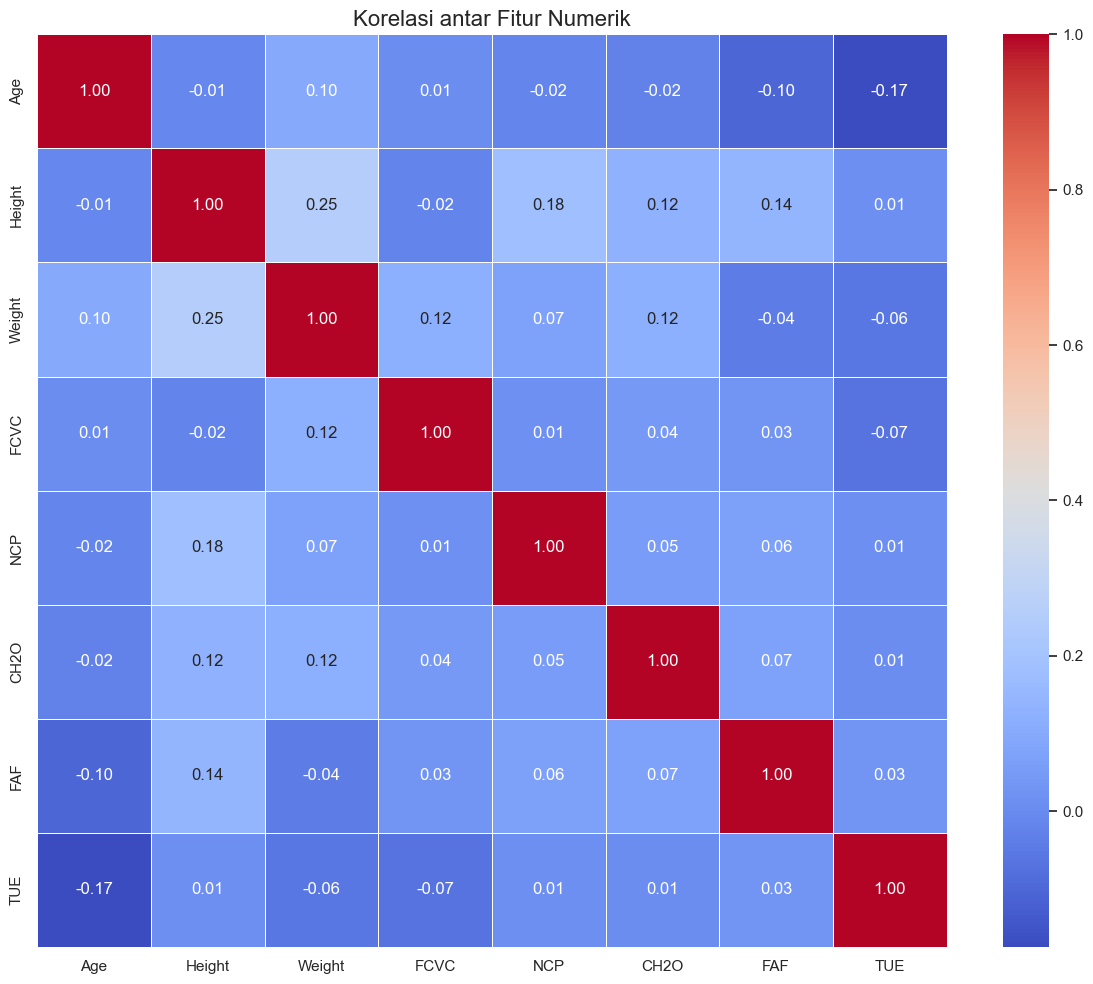

In [40]:
# 1.9 Visualisasi korelasi antar fitur numerik
print("\n1.9 Visualisasi korelasi antar fitur numerik:")
# Pastikan kita memiliki kolom numerik yang benar
# Konversi kolom yang mungkin bertipe string namun berisi nilai numerik
try:
    # Daftar kolom yang seharusnya numerik
    cols_to_numeric = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    
    # Konversi ke numerik dan tangani error dengan coercion
    for col in cols_to_numeric:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Pilih hanya kolom numerik yang valid
    numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    valid_numeric_cols = [col for col in numeric_cols if col in df.columns and not df[col].isna().all()]
    
    print(f"Kolom numerik yang akan digunakan untuk korelasi: {valid_numeric_cols}")
    
    if len(valid_numeric_cols) > 1:
        # Buat salinan data numerik dan tangani NaN
        numeric_data = df[valid_numeric_cols].copy()
        numeric_data = numeric_data.fillna(numeric_data.mean())
        
        # Hitung korelasi
        correlation = numeric_data.corr()
        
        plt.figure(figsize=(12, 10))
        heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
        plt.title('Korelasi antar Fitur Numerik', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("Tidak cukup kolom numerik yang valid untuk membuat visualisasi korelasi.")
except Exception as e:
    print(f"Error dalam pembuatan visualisasi korelasi: {e}")
    print("Melanjutkan ke tahap berikutnya...")


1.10 Visualisasi distribusi fitur numerik:


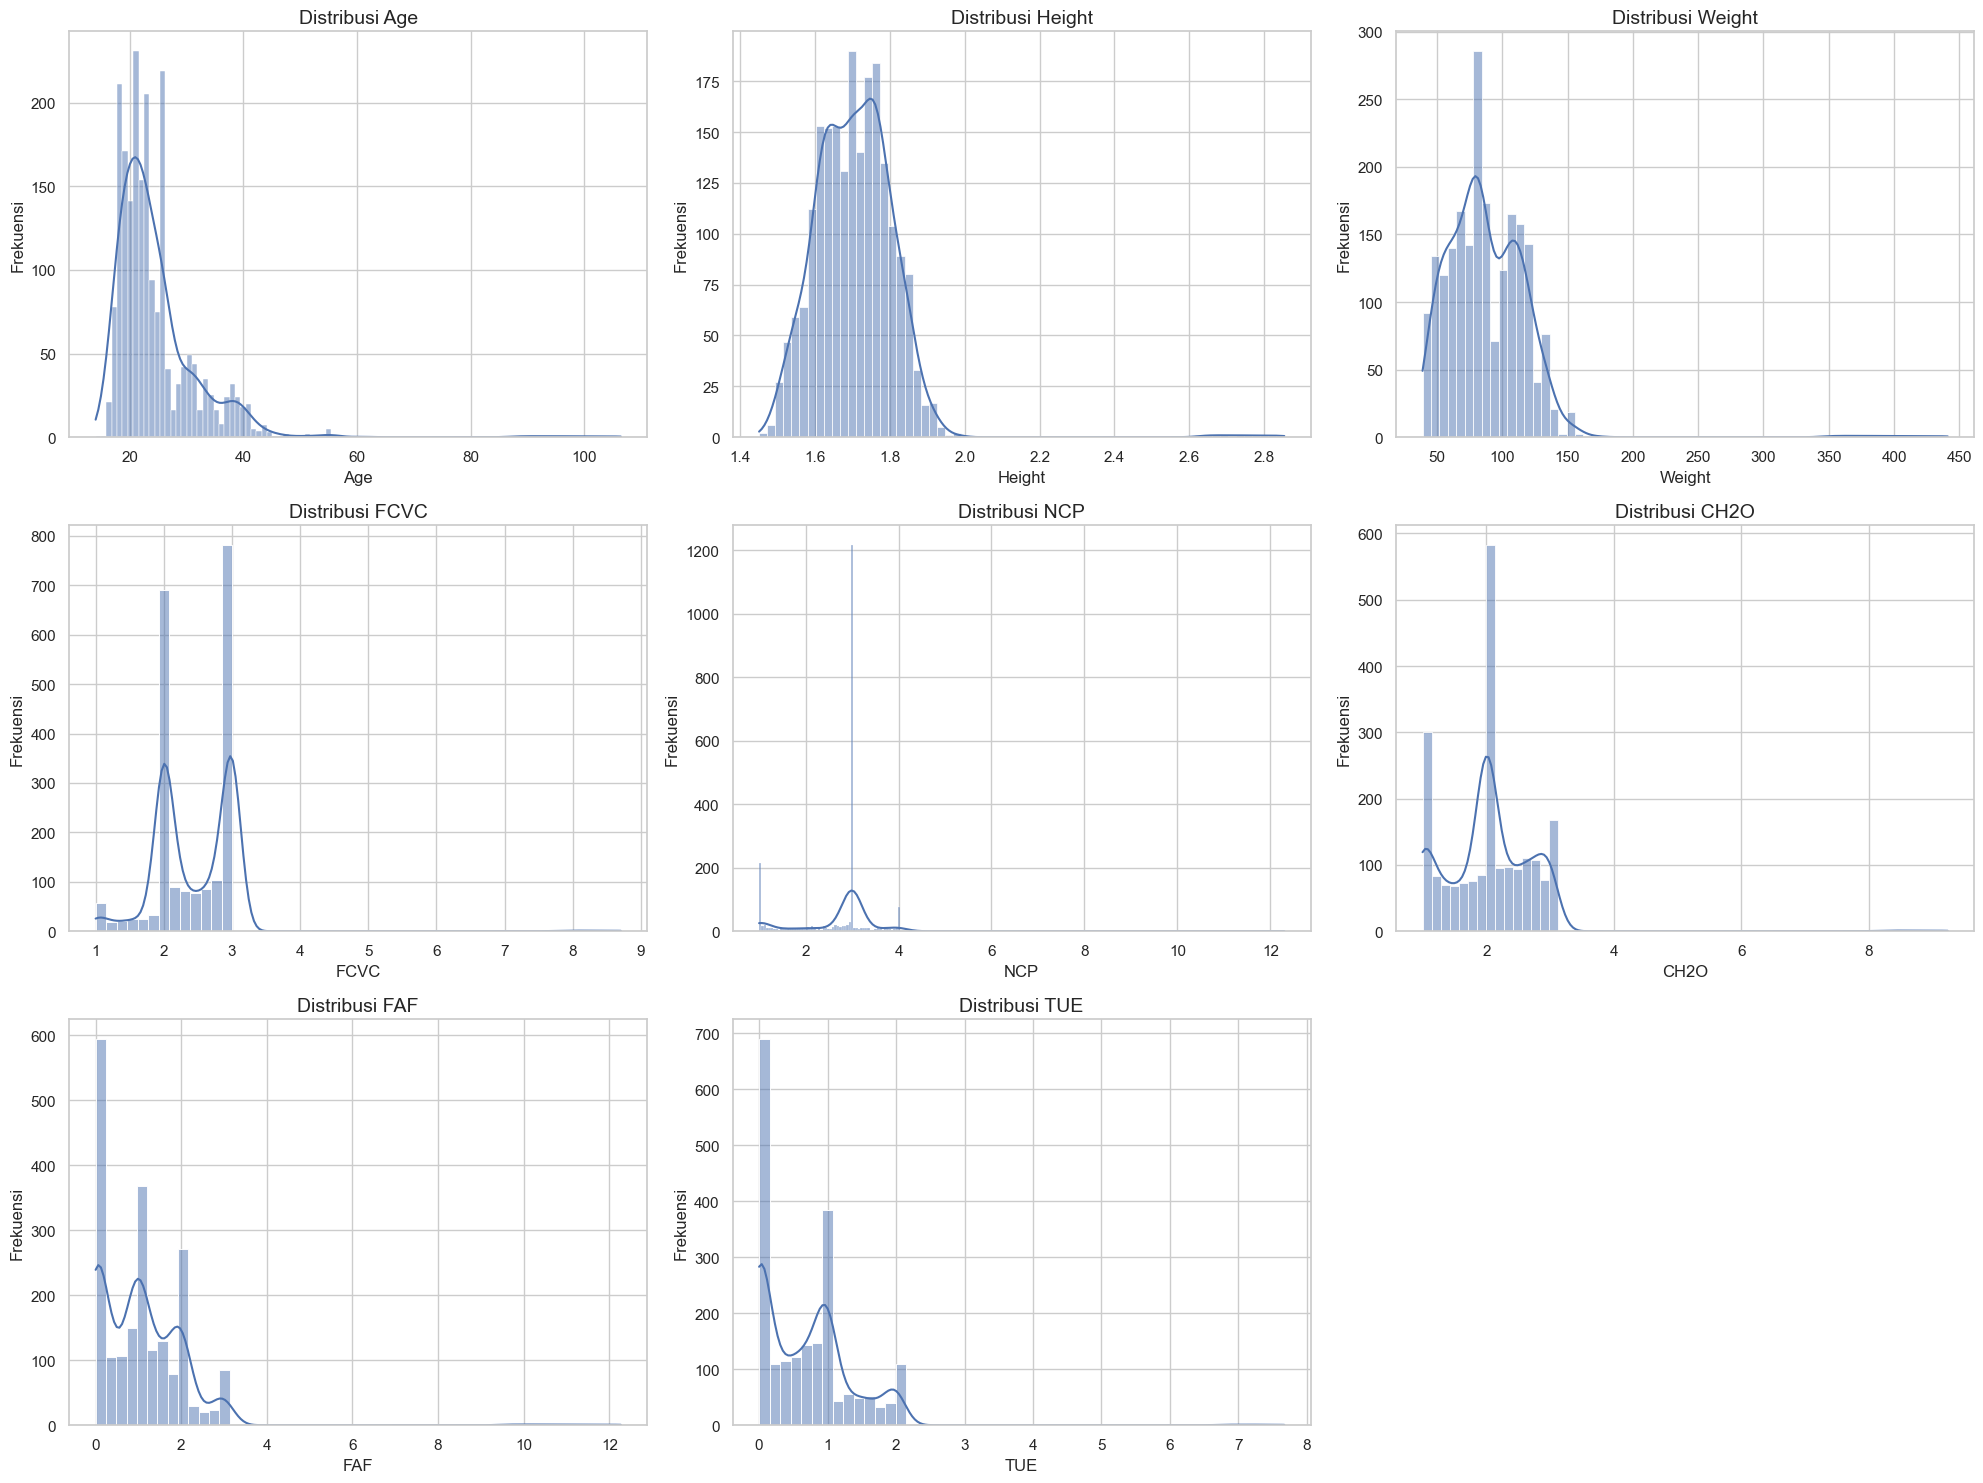

In [41]:
# 1.10 Visualisasi distribusi fitur numerik
print("\n1.10 Visualisasi distribusi fitur numerik:")
try:
    # Pastikan kita memiliki kolom numerik yang benar
    cols_to_numeric = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    
    # Konversi ke numerik dan tangani error dengan coercion
    for col in cols_to_numeric:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Pilih hanya kolom numerik yang valid
    valid_numeric_cols = [col for col in cols_to_numeric if col in df.columns and not df[col].isna().all()]
    
    # Visualisasi distribusi setiap fitur numerik
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(valid_numeric_cols):
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribusi {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error dalam pembuatan visualisasi distribusi fitur numerik: {e}")
    print("Melanjutkan ke tahap berikutnya...")


1.11 Deteksi outlier menggunakan boxplot:


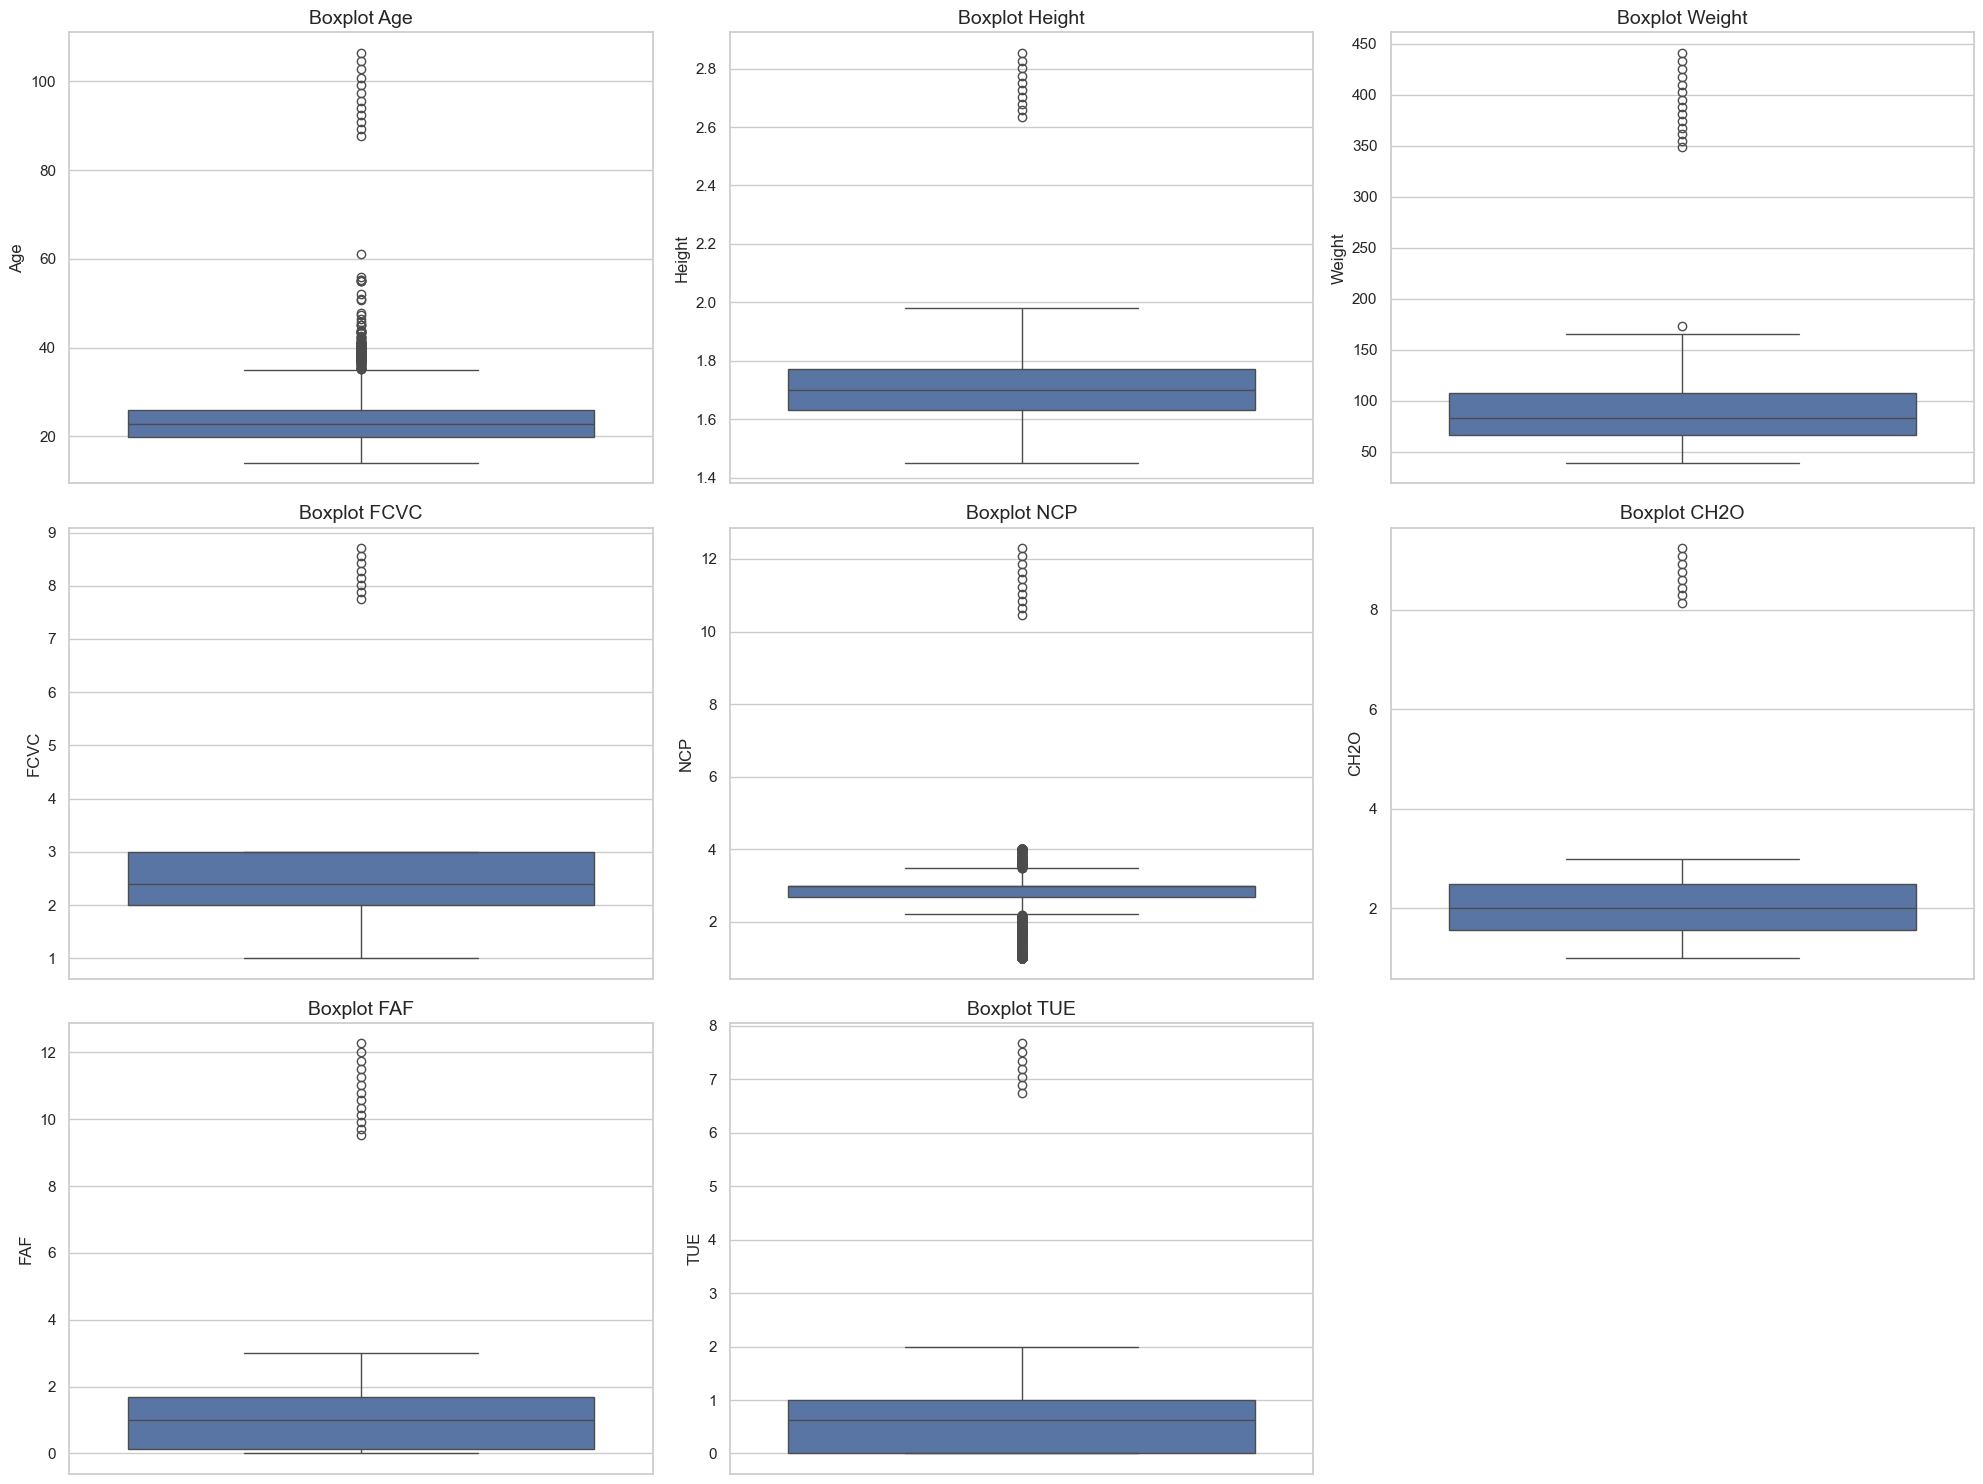

In [42]:
# 1.11 Deteksi outlier menggunakan boxplot untuk fitur numerik
print("\n1.11 Deteksi outlier menggunakan boxplot:")
try:
    # Gunakan kolom numerik yang sudah dikonversi sebelumnya
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(valid_numeric_cols):
        plt.subplot(3, 3, i+1)
        sns.boxplot(y=df[col].dropna())
        plt.title(f'Boxplot {col}', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error dalam pembuatan visualisasi boxplot: {e}")
    print("Melanjutkan ke tahap berikutnya...")


1.12 Visualisasi hubungan antara Gender dan Tingkat Obesitas:


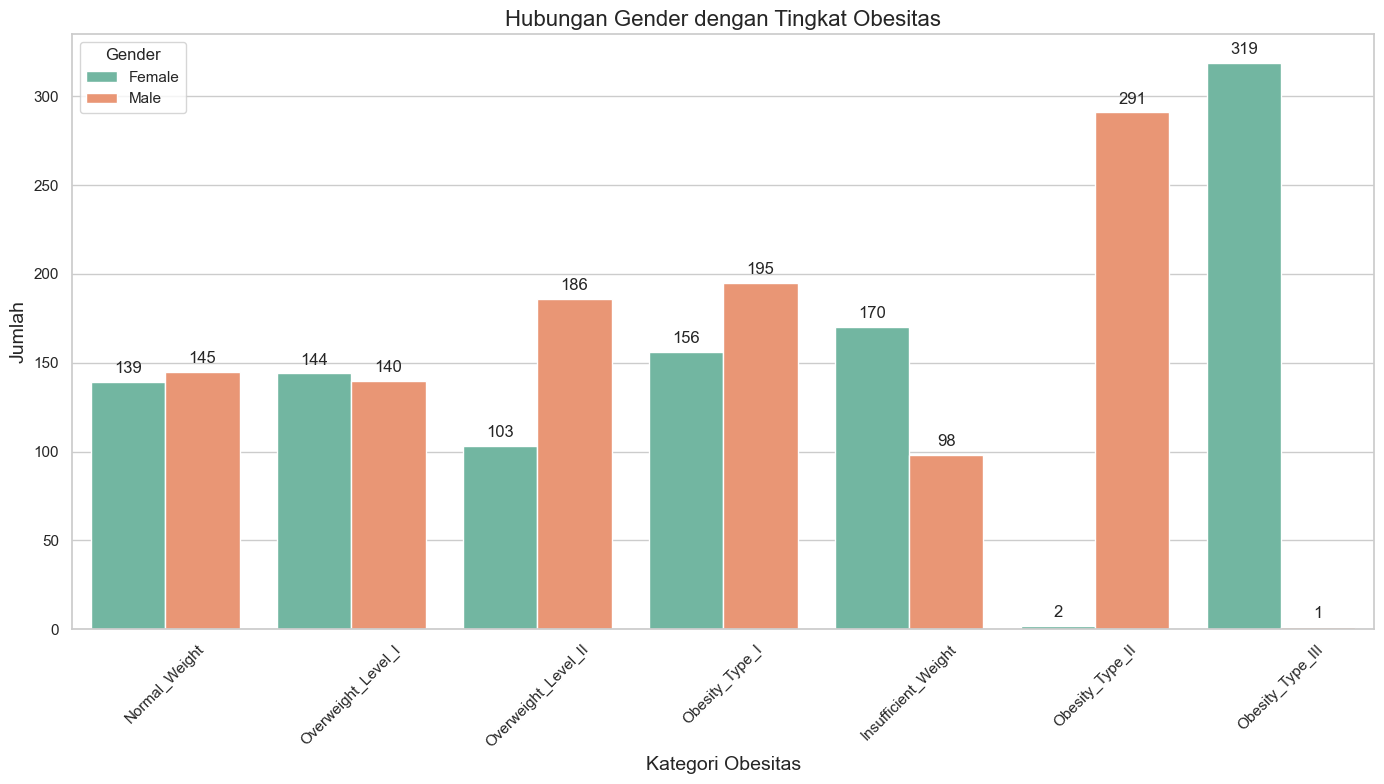

In [43]:
# 1.12 Visualisasi hubungan antara Gender dan Tingkat Obesitas
print("\n1.12 Visualisasi hubungan antara Gender dan Tingkat Obesitas:")
try:
    # Pastikan Gender dan NObeyesdad tidak memiliki nilai null
    temp_df = df.copy()
    temp_df = temp_df.dropna(subset=['Gender', 'NObeyesdad'])
    
    # Bersihkan nilai '?' yang mungkin ada di kolom Gender
    temp_df = temp_df[temp_df['Gender'] != '?']
    
    plt.figure(figsize=(14, 8))
    gender_plot = sns.countplot(x='NObeyesdad', hue='Gender', data=temp_df, palette='Set2')
    plt.title('Hubungan Gender dengan Tingkat Obesitas', fontsize=16)
    plt.xlabel('Kategori Obesitas', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    
    # Menambahkan label jumlah di atas bar
    for p in gender_plot.patches:
        height = p.get_height()
        if not np.isnan(height) and height > 0:
            gender_plot.text(p.get_x() + p.get_width()/2., height + 5, 
                    int(height), ha="center")
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error dalam pembuatan visualisasi Gender dan Obesitas: {e}")
    print("Melanjutkan ke tahap berikutnya...")

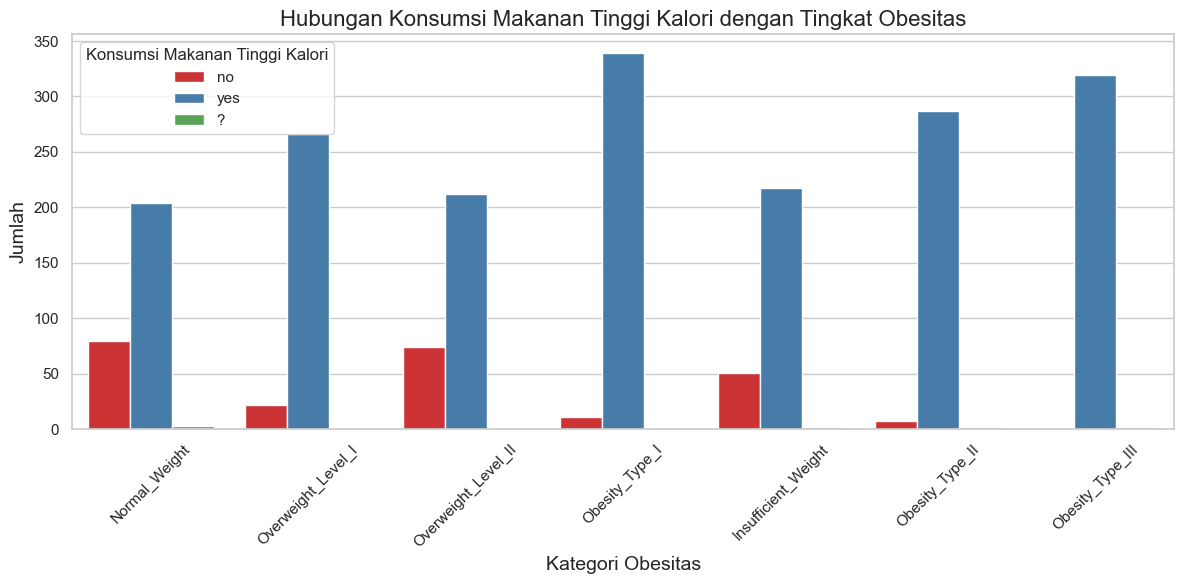

In [44]:
# 1.13 Visualisasi hubungan antara konsumsi makanan tinggi kalori dan Tingkat Obesitas
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='FAVC', data=df, palette='Set1')
plt.title('Hubungan Konsumsi Makanan Tinggi Kalori dengan Tingkat Obesitas', fontsize=16)
plt.xlabel('Kategori Obesitas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Konsumsi Makanan Tinggi Kalori')
plt.tight_layout()
plt.show()

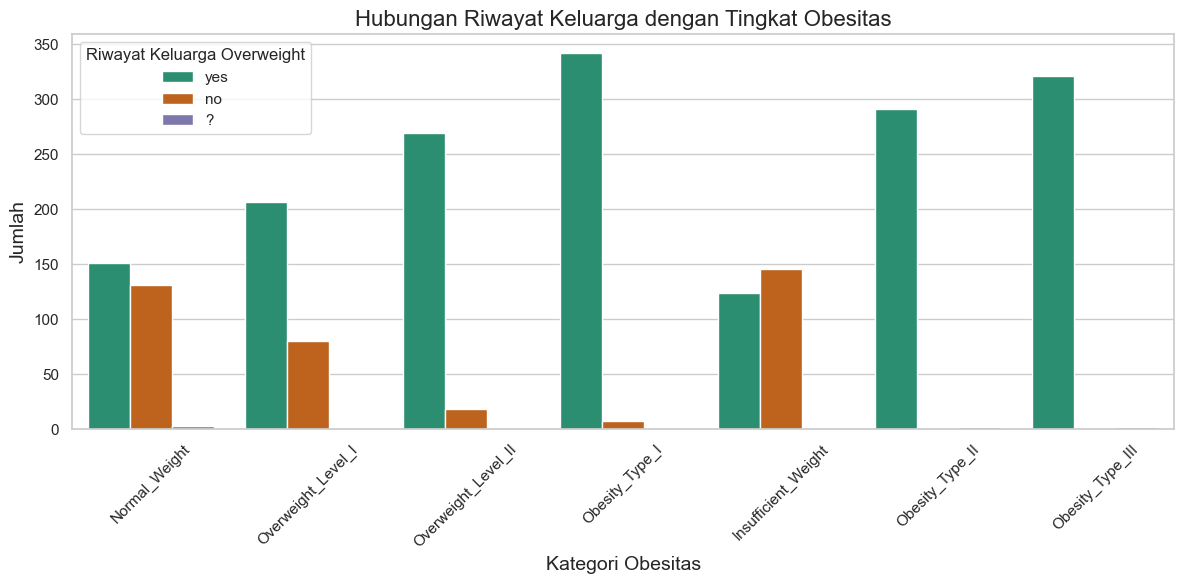

In [45]:
# 1.14 Visualisasi hubungan antara riwayat keluarga dengan Tingkat Obesitas
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=df, palette='Dark2')
plt.title('Hubungan Riwayat Keluarga dengan Tingkat Obesitas', fontsize=16)
plt.xlabel('Kategori Obesitas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Riwayat Keluarga Overweight')
plt.tight_layout()
plt.show()